In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np
from matplotlib import pyplot as plt

from test_base import TestNDTorus

In [2]:
def test_dims(kwargs, min_n_dim=1, max_n_dim=5, step=1, read_only=True):
    nd_ratios = []
    n_dims = list(range(min_n_dim, max_n_dim, step))
    for n_dim in n_dims:
        kwargs["n_dim"] = n_dim
        filename = f'test_combinations{kwargs["combinations"]}_deg{kwargs["degree"]}_dim{kwargs["n_dim"]}'
        tnd = TestNDTorus(**kwargs)
        if not read_only:
            header = ['non-zero_ratio', 'iterations']
            results = tnd.test_all(filename, header)
        header, results = tnd.read_results_from_csv(filename)
        np_results = np.array(results)
        nd_ratios.append(1-np_results[:,0]/100)
        # utils.plot_complex_on_unit_circle(tnd.D)

    plt.figure(figsize=(16,9))
    plt.boxplot(nd_ratios, vert=True, patch_artist=True, labels=n_dims)
    plt.ylabel("reduction ratio[%]")
    plt.xlabel("torus dimension")
    plt.title(f"nd torus deg={kwargs['degree']}, comb={kwargs['combinations']}")
    plt.show()
    return results

def test_degs(kwargs, min_deg=1, max_deg=10, step=1, read_only=True, filename_suffix=''):
    nd_ratios = []
    degs = list(range(min_deg, max_deg, step))
    for deg in degs:
        kwargs["degree"] = deg
        filename = f'test_combinations{kwargs["combinations"]}_deg{kwargs["degree"]}_dim{kwargs["n_dim"]}{filename_suffix}'
        tnd = TestNDTorus(**kwargs)
        if not read_only:
            header = ['non-zero_ratio', 'iterations']
            results = tnd.test_all(filename, header)
            print(f"shape {tnd.K.shape}")
        header, results = tnd.read_results_from_csv(filename)
        np_results = np.array(results)
        nd_ratios.append(1-np_results[:,0]/100)
        # utils.plot_complex_on_unit_circle(tnd.D)

    plt.figure(figsize=(16,9))
    plt.boxplot(nd_ratios, vert=True, patch_artist=True, labels=degs)
    plt.ylabel("reduction ratio[%]")
    plt.xlabel("degree")
    plt.title(f"nd torus {kwargs['n_dim']}-torus, comb={kwargs['combinations']}")
    plt.show()
    return results

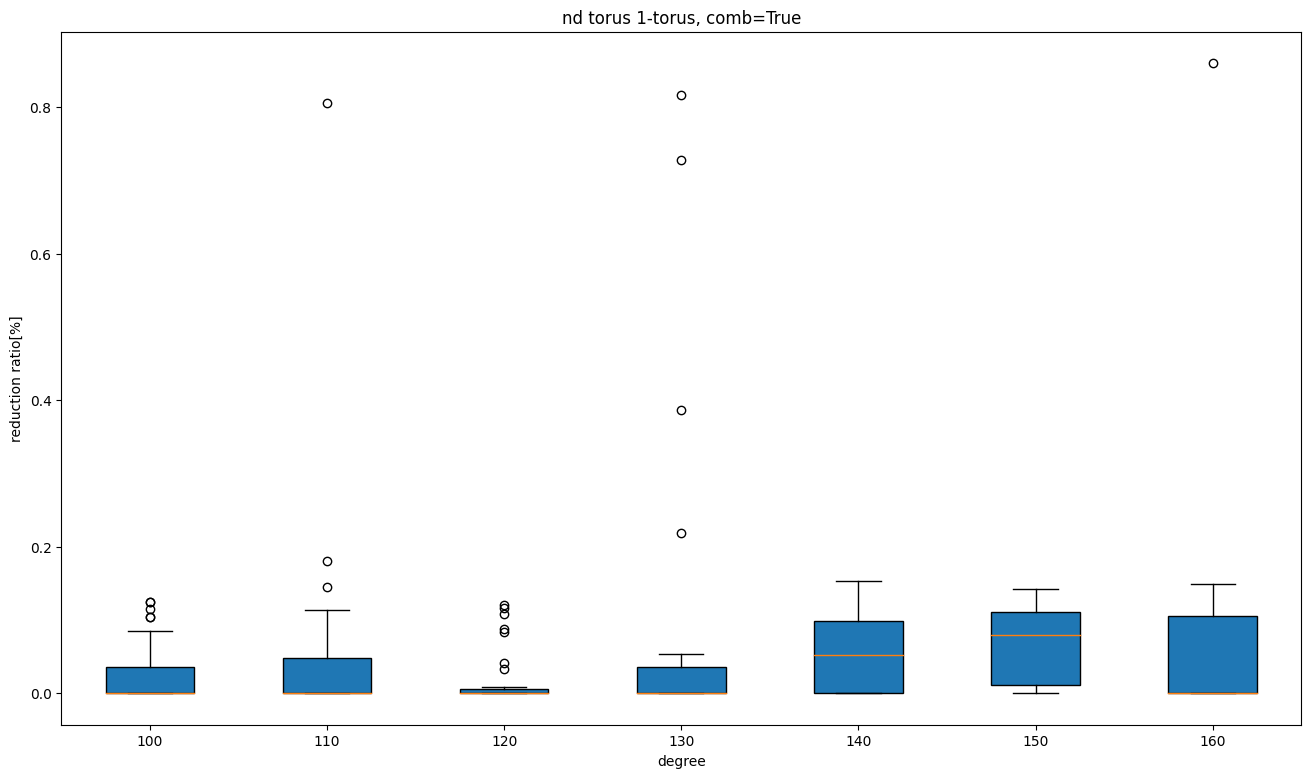

In [3]:
kwargs =  {
    'n_iter': 20,
    'n_dim': 1,
    'degree': 10,
    'ncols': 2,
    'combinations': True,
    'is_show_plot': False,
}

results = test_degs(kwargs, min_deg=100, max_deg=161, step=10, read_only=True, filename_suffix='_complex_initialization')


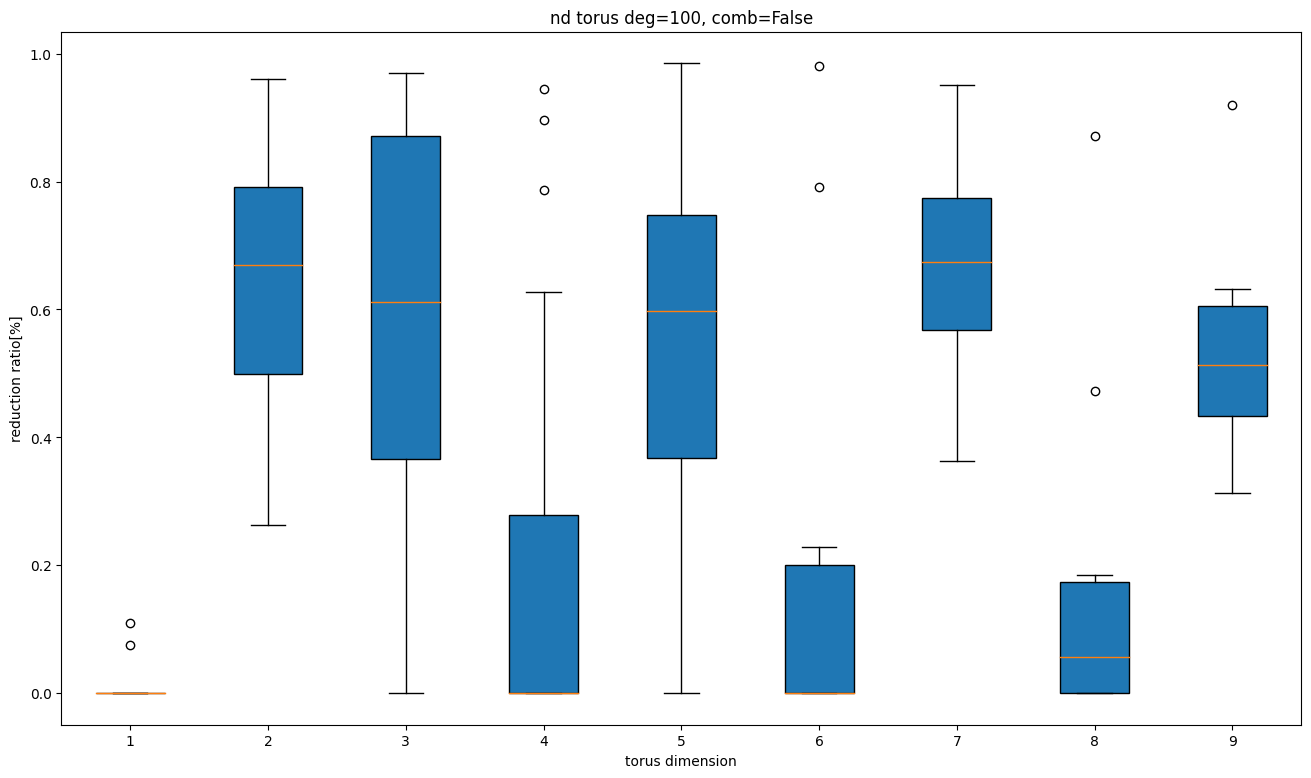

[[36.81592039800995, 86146.0],
 [37.81094527363184, 88333.0],
 [68.65671641791045, 156177.0],
 [44.27860696517413, 102838.0],
 [63.681592039801, 145530.0],
 [53.233830845771145, 122814.0],
 [57.711442786069654, 132616.0],
 [7.960199004975125, 19442.0],
 [45.27363184079602, 105255.0],
 [52.23880597014925, 120604.0]]

In [4]:
nd_ratios = []
kwargs['combinations'] = False
kwargs['degree'] = 100
test_dims(kwargs, max_n_dim=10, read_only=True)

In [10]:
import bases
degree = 5
for input_size in range(1, 5):
    print(f"input_size {input_size}, matrix row size {bases.fourier_basis(np.array([0 for _ in range(input_size)]), degree, combinations=True).shape[1]}")

input_size 1, matrix row size 11
input_size 2, matrix row size 121
input_size 3, matrix row size 1331
input_size 4, matrix row size 14641
